# Analysis of the INTERMAGNET data, looking in particular for patterns based on latitude, longitude

Let's see what happens!

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

In [2]:
import os

# Get the current working directory
current_path = os.getcwd()

# Print the current working directory
print("Current working directory:", current_path)

#define path to data folder where data will be placed. Print current path if you don't know what it is!
PATH = '/mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/data/'

Current working directory: /mnt/c/Users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/dBdtvsdHdt


<xarray.Dataset>
Dimensions:     (Time: 527040, XYZ: 3)
Coordinates:
  * Time        (Time) datetime64[ns] 2000-01-01 ... 2000-12-31T23:59:00
Dimensions without coordinates: XYZ
Data variables:
    BX_GSE      (Time) float64 ...
    BY_GSE      (Time) float64 ...
    BZ_GSE      (Time) float64 ...
    flow_speed  (Time) float64 ...
    dBdt_CLF    (Time, XYZ) float64 ...
<xarray.DataArray 'Time' (Time: 527040)>
array(['2000-01-01T00:00:00.000000000', '2000-01-01T00:01:00.000000000',
       '2000-01-01T00:02:00.000000000', ..., '2000-12-31T23:57:00.000000000',
       '2000-12-31T23:58:00.000000000', '2000-12-31T23:59:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * Time     (Time) datetime64[ns] 2000-01-01 ... 2000-12-31T23:59:00
<xarray.DataArray 'dBdt_CLF' (Time: 527040, XYZ: 3)>
[1581120 values with dtype=float64]
Coordinates:
  * Time     (Time) datetime64[ns] 2000-01-01 ... 2000-12-31T23:59:00
Dimensions without coordinates: XYZ
Attributes:
    units:        nT/min
  

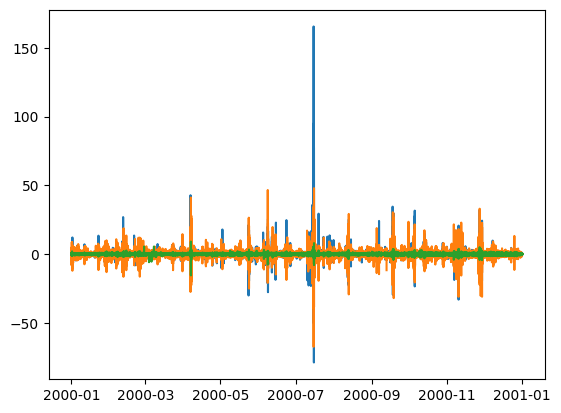

In [5]:
observatory= 'CLF'

ds = xr.open_dataset(PATH+ 'data_'+observatory+'.nc')

print(ds)
print(ds['Time'])
print(ds['dBdt_'+observatory])

plt.plot(ds['Time'],ds['dBdt_'+observatory])
plt.show()

df = ds.to_dataframe() #I prefer pandas


In [7]:
Y=ds['dBdt_CLF']
Y=np.array(Y)

print(Y[:,0])

[ nan  0.1 -0.3 ... -0.1  0.1  0. ]


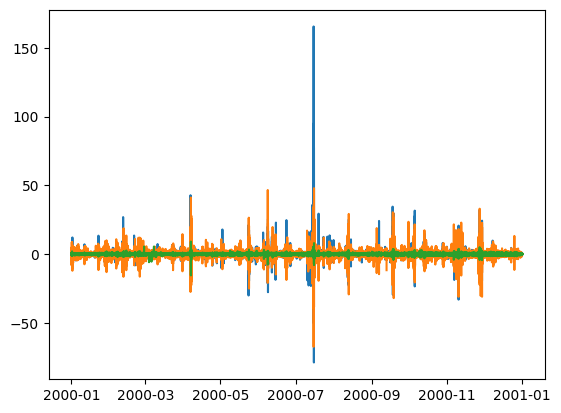

In [8]:
plt.plot(ds['Time'],Y)

In [9]:
Ytot=[]

for i in range(len(Y)):
    Ytot.append((Y[i,0]**2+Y[i,1]**2+Y[i,2]**2)**(1/2))
    
averagedb=np.nanmean(Ytot)
print(averagedb)

0.9004503929073852


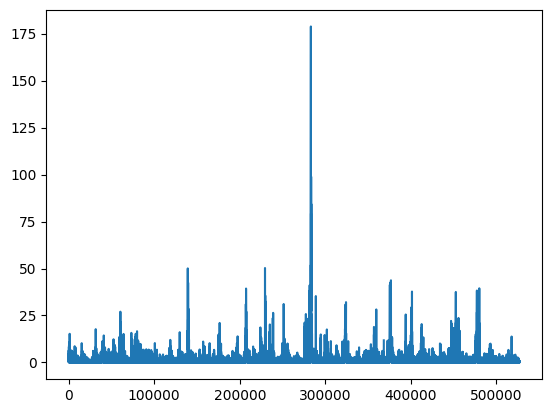

In [10]:
plt.plot(Ytot)

In [11]:
averagedBarray=[]
Latarray=[]
Longarray=[]

df1 = pd.read_csv('data/ObsListimo.csv')
print(df1)

Code=np.array(df1['Code'])
print(Code)
Lat=df1['Latitude']
Long=df1['Longitude']

for i in tqdm.tqdm(Code):
    try:
        string='dBdt_'+str(i)
        pathstring=PATH + 'data_'+str(i)+'.nc'
    
        ds = xr.open_dataset(pathstring)
        
        Y=ds[string]
        Y=np.array(Y)

        #print(ds[string])
        
        #plt.plot(ds['Time'],ds[string])
        #plt.show()
        
        Ytot=[]
        for i in range(len(Y)):
            Ytot.append((Y[i,0]**2+Y[i,1]**2+Y[i,2]**2)**(1/2))
    
        averagedb=np.nanmean(Ytot)
        averagedBarray.append(averagedb)
        
    except:
        averagedBarray.append(0)



    Code                                           Location        Country  \
0    ABG                                             Alibag          India   
1    ABK                                             Abisko         Sweden   
2    AIA  Faraday Islands (Argentine Island) - Akademik ...     Antarctica   
3    API                                               Apia  Western Samoa   
4    ARS                                               Arti         Russia   
..   ...                                                ...            ...   
117  VSS                                          Vassouras         Brazil   
118  WIC                                 Conrad Observatory        Austria   
119  WNG                                             Wingst        Germany   
120  YAK                                            Yakutsk         Russia   
121  YKC                                        Yellowknife         Canada   

     Latitude  Longitude Network Contact  
0     18.6380     72

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [01:06<00:00,  1.83it/s]


122 122


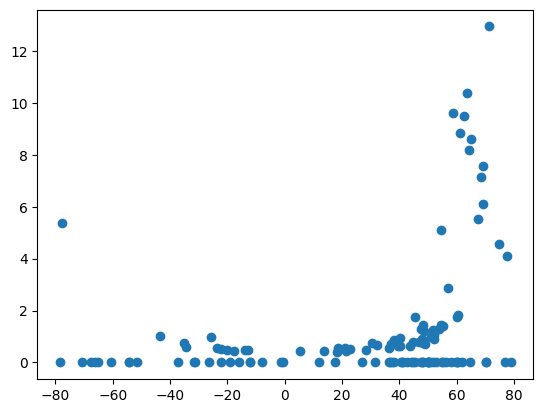

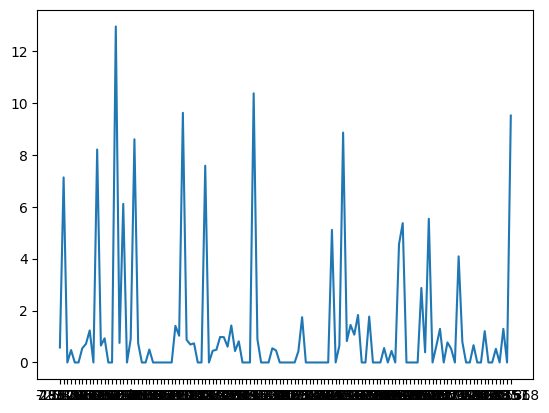

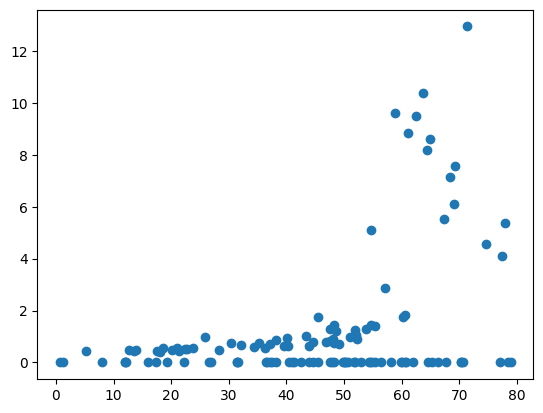

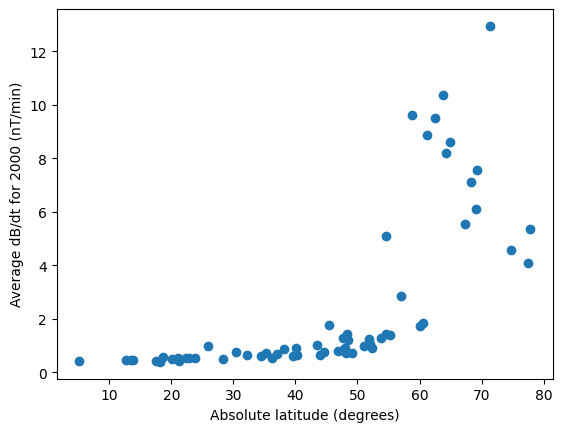

In [9]:
LatMod=[]
LatModforvalid=[]
averagedBarrayforvalid=[]

for i in Lat:
    LatMod.append((i**2)**(1/2))
    
for i in range(len(averagedBarray)):
    if averagedBarray[i]<0.1:
        continue
    else:
        LatModforvalid.append(LatMod[i])
        averagedBarrayforvalid.append(averagedBarray[i])
        
print(len(Lat),len(averagedBarray))
        
plt.scatter(Lat,averagedBarray)
plt.show()
plt.plot(Long,averagedBarray)
plt.show()
plt.scatter(LatMod,averagedBarray)
plt.show()
plt.xlabel("Absolute latitude (degrees)")
plt.ylabel("Average dB/dt for 2000 (nT/min)")
plt.scatter(LatModforvalid,averagedBarrayforvalid)

In [10]:
ArrayofLats=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(Code)):
    if Lat[i]<-80:
        ArrayofLats[0]+=1
    elif Lat[i]>-80 and Lat[i]<-70:
        ArrayofLats[1]+=1
    elif Lat[i]>-70 and Lat[i]<-60:
        ArrayofLats[2]+=1
    elif Lat[i]>-60 and Lat[i]<-50:
        ArrayofLats[3]+=1
    elif Lat[i]>-50 and Lat[i]<-40:
        ArrayofLats[4]+=1
    elif Lat[i]>-40 and Lat[i]<-30:
        ArrayofLats[5]+=1
    elif Lat[i]>-30 and Lat[i]<-20:
        ArrayofLats[6]+=1
    elif Lat[i]>-20 and Lat[i]<-10:
        ArrayofLats[7]+=1
    elif Lat[i]>-10 and Lat[i]<0:
        ArrayofLats[8]+=1
    elif Lat[i]>0 and Lat[i]<10:
        ArrayofLats[9]+=1
    elif Lat[i]>10 and Lat[i]<20:
        ArrayofLats[10]+=1
    elif Lat[i]>20 and Lat[i]<30:
        ArrayofLats[11]+=1
    elif Lat[i]>30 and Lat[i]<40:
        ArrayofLats[12]+=1
    elif Lat[i]>40 and Lat[i]<50:
        ArrayofLats[13]+=1
    elif Lat[i]>50 and Lat[i]<60:
        ArrayofLats[14]+=1
    elif Lat[i]>60 and Lat[i]<70:
        ArrayofLats[15]+=1
    elif Lat[i]>70 and Lat[i]<80:
        ArrayofLats[16]+=1
    else:
        ArrayofLats[17]+=1

18


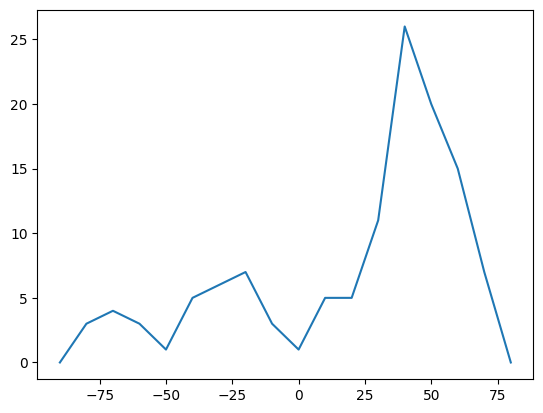

In [11]:
X=range(-90,90,10)

print(len(X))

plt.plot(X,ArrayofLats)

In [12]:
string1='dBdt_LER'

ds1 = xr.open_dataset(PATH+'data_LER.nc')
Y1=ds1[string1]
Y1=np.array(Y1)

Y1tot=[]

for i in range(len(Y1)):
    Y1tot.append((Y1[i,0]**2+Y1[i,1]**2+Y1[i,2]**2)**(1/2))


correlationarray=[]
Latarray=[]
Longarray=[]

df1 = pd.read_csv('data/ObsListimo.csv')
print(df1)

Code=np.array(df1['Code'])
print(Code)
Lat=df1['Latitude']
Long=df1['Longitude']

for i in tqdm.tqdm(Code):
    try:
        string='dBdt_'+str(i)
        pathstring=PATH+'data_'+str(i)+'.nc'
    
        ds = xr.open_dataset(pathstring)
        
        Y=ds[string]
        Y=np.array(Y)
        Ytot=[]
        for i in range(len(Y)):
            Ytot.append((Y[i,0]**2+Y[i,1]**2+Y[i,2]**2)**(1/2))


        #print(ds[string])
        
        #plt.plot(ds['Time'],ds[string])
        #plt.show()
        correlationarray.append(np.corrcoef(Y1tot,Ytot))
        
    except:
        continue



    Code                                           Location        Country  \
0    ABG                                             Alibag          India   
1    ABK                                             Abisko         Sweden   
2    AIA  Faraday Islands (Argentine Island) - Akademik ...     Antarctica   
3    API                                               Apia  Western Samoa   
4    ARS                                               Arti         Russia   
..   ...                                                ...            ...   
117  VSS                                          Vassouras         Brazil   
118  WIC                                 Conrad Observatory        Austria   
119  WNG                                             Wingst        Germany   
120  YAK                                            Yakutsk         Russia   
121  YKC                                        Yellowknife         Canada   

     Latitude  Longitude Network Contact  
0     18.6380     72

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:58<00:00,  2.08it/s]


In [13]:
print(correlationarray)

[array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]), array([[nan, nan],
       [nan, nan]]),

In [14]:
for i in tqdm.tqdm(Code):
    string='dBdt_'+str(i)
    pathstring=PATH+'data_'+str(i)+'.nc'
    
    ds = xr.open_dataset(pathstring)
     
    Y=ds[string]
    Y=np.array(Y)
    #print(ds[string])
    
    #plt.plot(ds['Time'],ds[string])
    #plt.show()
    correlationarray.append(np.corrcoef(Y1,Y))



  0%|                                                                                                                                                                                    | 0/122 [00:00<?, ?it/s]


MemoryError: Unable to allocate 8.08 TiB for an array with shape (1054080, 1054080) and data type float64

array([<Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>,
       <Axes: xlabel='Timestamp'>, <Axes: xlabel='Timestamp'>],
      dtype=object)

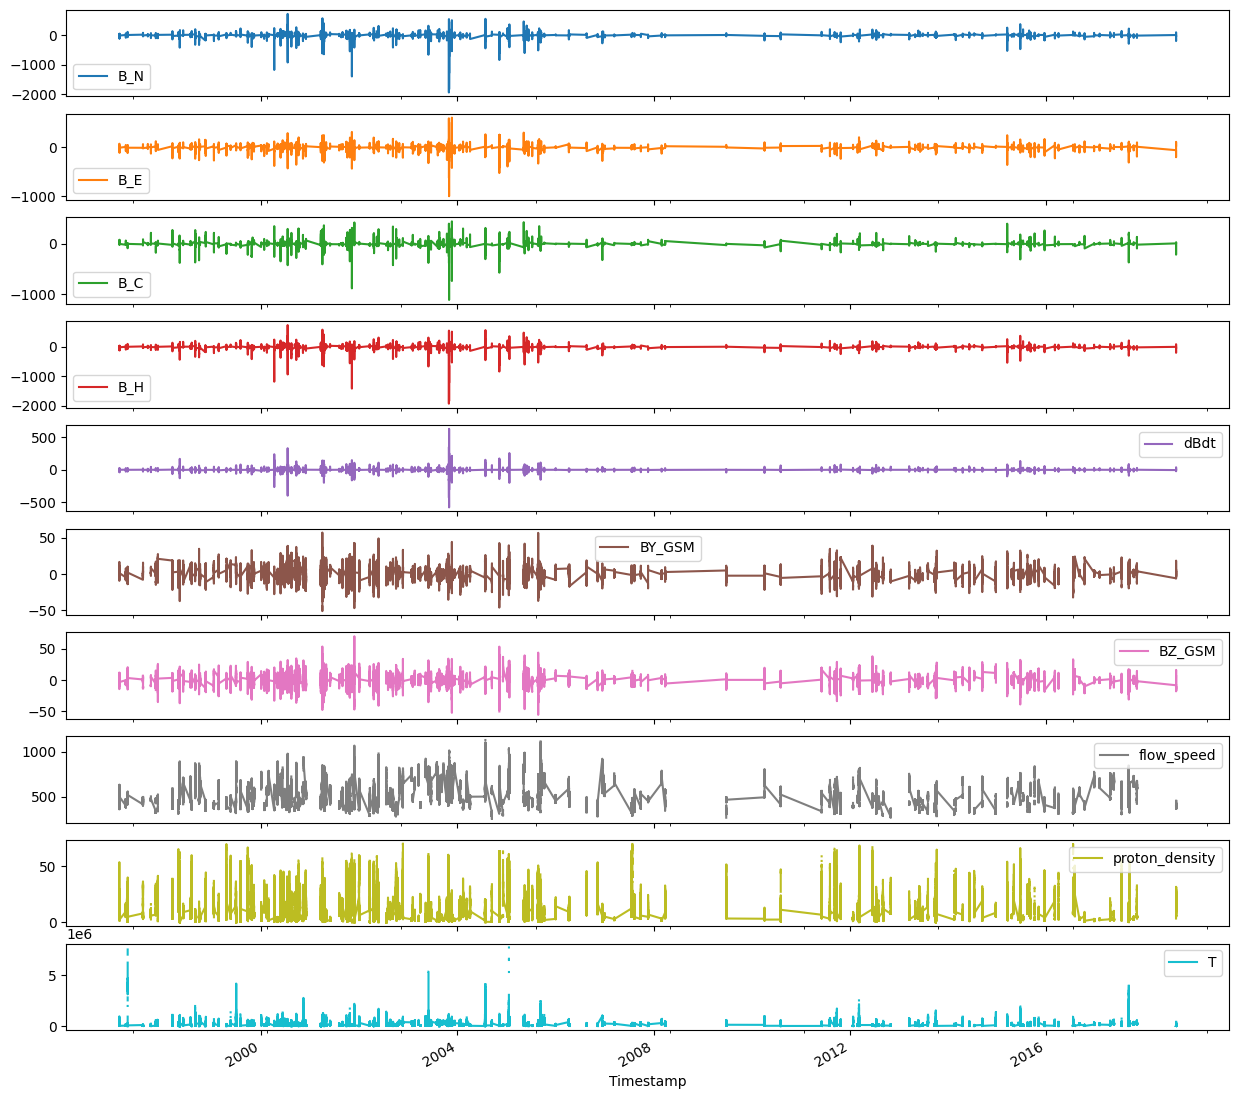

In [15]:
import xarray as xr

## Load dataset
df = xr.open_dataset('/mnt/c/users/s1725621/Documents/PhDCode/Python/Hapiclient/ML_SpaceWeather/4th_project/data/ESKOMNI.nc').to_dataframe()
## Inspect dataset
df.plot(subplots=True, figsize=[15,15])

In [16]:
import os
cwd = os.getcwd()
print(cwd)

/mnt/c/Users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/dBdtvsdHdt


array([<Axes: xlabel='Time,XYZ'>, <Axes: xlabel='Time,XYZ'>,
       <Axes: xlabel='Time,XYZ'>, <Axes: xlabel='Time,XYZ'>,
       <Axes: xlabel='Time,XYZ'>], dtype=object)

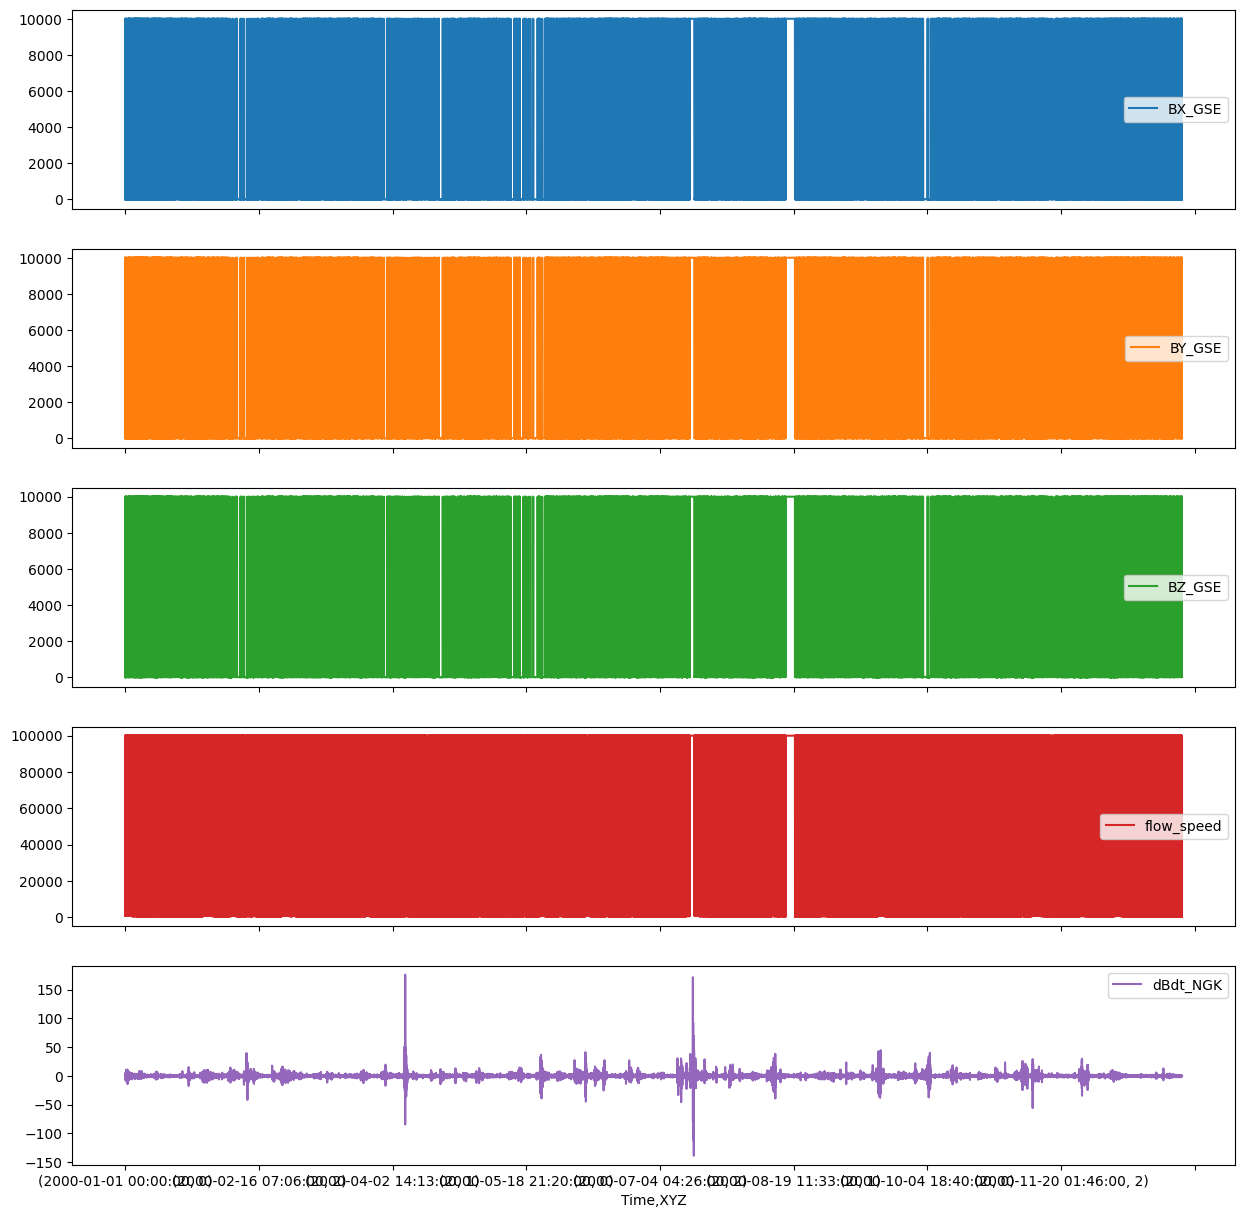

In [17]:
import xarray as xr

## Load dataset
df = xr.open_dataset(PATH+'data_NGK.nc').to_dataframe()
## Inspect dataset
df.plot(subplots=True, figsize=[15,15])

